In [1]:
import os, sys
sys.path.append(os.path.abspath("../../"))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import dowhy
from dowhy.causal_model import CausalModel
import dowhy.datasets, dowhy.plotter

In [3]:
from dowhy.causal_estimator import CausalEstimator

Vou criar meu próprio Dataframe para verificar a utilização do doWhy.

Vou utilizar o seguinte sistema:

$X = N_{X}$

$Y = 2\cdot X + N_{Y}$

$N_X, N_Y \sim N(0,1)$

In [4]:
Ex = np.random.normal(0, 1, 1000)
Ey = np.random.normal(0, 1, 1000)
X = Ex
Y = 2*X + Ey
teste_dict = {'teste_outcome':Y, 'teste_treatment':X}
teste_df = pd.DataFrame(teste_dict)

ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['teste_treatment'] on outcome ['teste_outcome']
INFO:dowhy.causal_graph:Using Matplotlib for plotting
INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['U']


WARN: Do you want to continue by ignoring these unobserved confounders? [y/n] y


INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]


Estimand type: ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
       d                                   
───────────────(Expectation(teste_outcome))
dtesteₜᵣₑₐₜₘₑₙₜ                            
Estimand assumption 1, Unconfoundedness: If U→teste_treatment and U→teste_outcome then P(teste_outcome|teste_treatment,,U) = P(teste_outcome|teste_treatment,)
### Estimand : 2
Estimand name: iv
No such variable found!



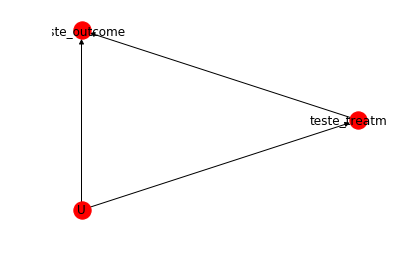

In [5]:
teste_model = CausalModel(data = teste_df, 
                          treatment = "teste_treatment", 
                          outcome = "teste_outcome", 
                          graph = "digraph  {teste_treatment -> teste_outcome;}")
teste_model.view_model(layout="dot")
identified_estimand = teste_model.identify_effect()
print(identified_estimand)

In [6]:
print(teste_model.estimate_effect(identified_estimand, method_name="backdoor.linear_regression").value)

INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
INFO:dowhy.causal_estimator:b: teste_outcome~teste_treatment


2.009766691344297


Testando com um novo modelo:

$X_{1} = N_{1}$

$X_{2} = N_{2}$

$Y = 3*X_{1} + 5*X_{2} + N_{3}$

$N_1, N_2, N_3 \sim N(0.2,1)$

ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['x_1'] on outcome ['outcome']
INFO:dowhy.causal_graph:Using Matplotlib for plotting


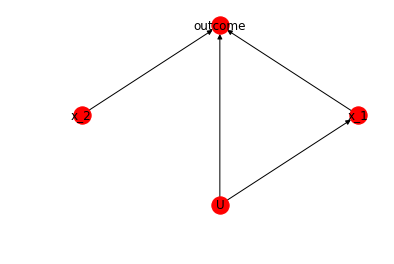

In [7]:
N1 = np.random.normal(0.2, 1, 1000)
N2 = np.random.normal(0.2, 1, 1000)
N3 = np.random.normal(0.2, 1, 1000)
X1 = N1
X2 = N2
Y = 7*X1 + 5*X2 + N3
modelo2_dict = {'outcome': Y, 'x_1' : X1, 'x_2' : X2}
modelo2_df = pd.DataFrame(modelo2_dict)
dag = 'digraph { x_1 -> outcome; x_2 -> outcome;}'
model2 = CausalModel(data = modelo2_df, outcome="outcome", treatment="x_1", graph=dag)
model2.view_model(layout="dot")

In [8]:
identified_estimand = model2.identify_effect()
print(identified_estimand)

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['U']


WARN: Do you want to continue by ignoring these unobserved confounders? [y/n] y


INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]


Estimand type: ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d                       
───(Expectation(outcome))
dx₁                      
Estimand assumption 1, Unconfoundedness: If U→x_1 and U→outcome then P(outcome|x_1,,U) = P(outcome|x_1,)
### Estimand : 2
Estimand name: iv
No such variable found!



In [9]:
print(model2.estimate_effect(identified_estimand, method_name="backdoor.linear_regression").value)

INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
INFO:dowhy.causal_estimator:b: outcome~x_1


6.781062881942491


Testando um novo modelo:

$Z = N_1$

$X = 2*Z + N_2$

$Y = X + Y + N_3$

$N_1, N_2, N_3 \sim N(0, 1)$

ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['treatment'] on outcome ['outcome']
INFO:dowhy.causal_graph:Using Matplotlib for plotting


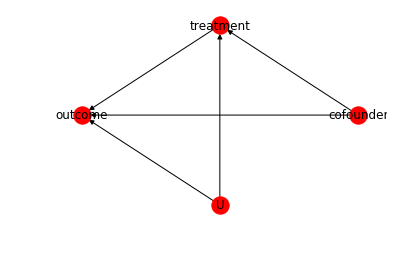

In [10]:
N1 = np.random.normal(0.2, 1, 1000)
N2 = np.random.normal(0.2, 1, 1000)
N3 = np.random.normal(0.2, 1, 1000)
Z = N1
X = 2*Z + N2
Y = X + Z + N3
modelo3_dict = {'outcome': Y, 'treatment' : X, 'cofounder' : Z}
modelo3_df = pd.DataFrame(modelo3_dict)
dag = 'digraph { cofounder -> treatment -> outcome; cofounder -> outcome}'
model3 = CausalModel(data = modelo3_df, outcome="outcome", treatment="treatment", graph=dag)
model3.view_model(layout="dot")

In [11]:
identified_estimand = model3.identify_effect()
print(identified_estimand)

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['U', 'cofounder']


WARN: Do you want to continue by ignoring these unobserved confounders? [y/n] y


INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]


Estimand type: ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                                     
──────────(Expectation(outcome|cofounder))
dtreatment                                
Estimand assumption 1, Unconfoundedness: If U→treatment and U→outcome then P(outcome|treatment,cofounder,U) = P(outcome|treatment,cofounder)
### Estimand : 2
Estimand name: iv
No such variable found!



In [12]:
print(model3.estimate_effect(identified_estimand, method_name="backdoor.linear_regression").value)

INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
INFO:dowhy.causal_estimator:b: outcome~treatment+cofounder


1.0208325086803658


Mais um teste:

$A = N_1$ (Age)

$S = N_2$ (Sex)

$E = A + S*3 + N_3$ (Education)

$R = E + N_4$ (Residence)

$O = E*2 + N_5$ (Ocupation)

$T = R + O + N_6$ (Travel)

$N_1 \sim N(30, 10)$

$N_2 \sim Be(0.5)$

$N_3, N_4, N_5, N_6 \sim N(0,1)$



ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['ocupation'] on outcome ['travel']
INFO:dowhy.causal_graph:Using Matplotlib for plotting


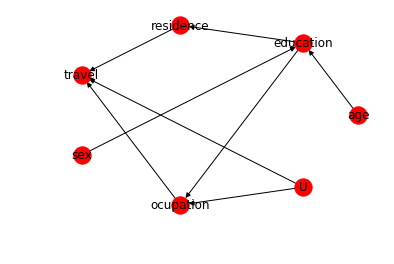

In [13]:
N1 = np.random.normal(30, 10, 1000)
N2 = np.random.binomial(1, 0.5, 1000)
N3 = np.random.normal(0, 1, 1000)
N4 = np.random.normal(0, 1, 1000)
N5 = np.random.normal(0, 1, 1000)
N6 = np.random.normal(0, 1, 1000)
A = N1
S = N2
E = A + 3*S + N3
R = E + N4
O = E*2 + N5
T = R + 3*O + N6
modelo4_dict = {'age': A, 'sex' : S, 'education' : E, 'residence': R, 'ocupation': O, 'travel': T}
modelo4_df = pd.DataFrame(modelo4_dict)
dag = 'digraph { age -> education -> residence -> travel; sex -> education -> ocupation -> travel;}'
model4 = CausalModel(data = modelo4_df, outcome="travel", treatment="ocupation", graph=dag)
model4.view_model(layout="dot")

In [14]:
identified_estimand = model4.identify_effect()
print(identified_estimand)

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['sex', 'U', 'age', 'education']


WARN: Do you want to continue by ignoring these unobserved confounders? [y/n] y


INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]


Estimand type: ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                                            
──────────(Expectation(travel|sex,age,education))
docupation                                       
Estimand assumption 1, Unconfoundedness: If U→ocupation and U→travel then P(travel|ocupation,sex,age,education,U) = P(travel|ocupation,sex,age,education)
### Estimand : 2
Estimand name: iv
No such variable found!



In [15]:
print(model4.estimate_effect(identified_estimand, method_name="backdoor.linear_regression").value)

INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
INFO:dowhy.causal_estimator:b: travel~ocupation+sex+age+education


2.9456924735390886


In [16]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(modelo4_df.drop(['travel'], axis = 1), modelo4_df.travel)
print('Param O: ',lm.coef_[-1])

Param O:  2.9716655339579447


Os coeficientes do método de regressão linear simples e o método do pacote DoWhy foram praticamente os mesmos. 
Vou passar o mesmo modelo porém usando um DAG errado, vamos ver o que ocorre.

ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['ocupation'] on outcome ['travel']
INFO:dowhy.causal_graph:Using Matplotlib for plotting


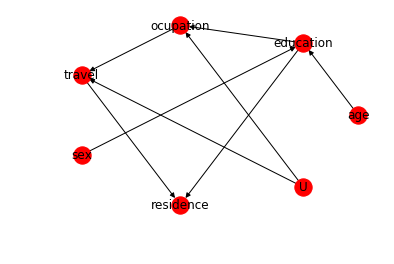

In [17]:
dag = 'digraph { age -> education -> ocupation -> travel; sex -> education -> residence; travel -> residence}'
model4_err = CausalModel(data = modelo4_df, outcome="travel", treatment="ocupation", graph=dag)
model4_err.view_model(layout="dot")

In [18]:
identified_estimand = model4_err.identify_effect()
print(identified_estimand)

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['U']


WARN: Do you want to continue by ignoring these unobserved confounders? [y/n] y


INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:['education']


Estimand type: ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                          
──────────(Expectation(travel))
docupation                     
Estimand assumption 1, Unconfoundedness: If U→ocupation and U→travel then P(travel|ocupation,,U) = P(travel|ocupation,)
### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(travel, education)/Derivative(ocupation, education))
Estimand assumption 1, As-if-random: If U→→travel then ¬(U →→education)
Estimand assumption 2, Exclusion: If we remove {education}→ocupation, then ¬(education→travel)



In [19]:
estimate = model4_err.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression")
estimate.value

INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
INFO:dowhy.causal_estimator:b: travel~ocupation


In [20]:
res_random=model4_err.refute_estimate(identified_estimand, estimate, method_name="random_common_cause")
print(res_random)

INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
INFO:dowhy.causal_estimator:b: travel~ocupation+w_random


Refute: Add a Random Common Cause
Estimated effect:(3.5005043083330363,)
New effect:(3.500412347299294,)



In [21]:
res_placebo=model4_err.refute_estimate(identified_estimand, estimate,
        method_name="placebo_treatment_refuter", placebo_type="permute")
print(res_placebo)

INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
INFO:dowhy.causal_estimator:b: travel~placebo


Refute: Use a Placebo Treatment
Estimated effect:(3.5005043083330363,)
New effect:(0.005995038265118676,)



In [22]:
res_subset=model4_err.refute_estimate(identified_estimand, estimate,
        method_name="data_subset_refuter", subset_fraction=0.9)
print(res_subset)

INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
INFO:dowhy.causal_estimator:b: travel~ocupation


Refute: Use a subset of data
Estimated effect:(3.5005043083330363,)
New effect:(3.500417986545421,)



In [23]:
help(CausalModel)

Help on class CausalModel in module dowhy.causal_model:

class CausalModel(builtins.object)
 |  CausalModel(data, treatment, outcome, graph=None, common_causes=None, instruments=None, estimand_type='ate', proceed_when_unidentifiable=False, **kwargs)
 |  
 |  Main class for storing the causal model state.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, data, treatment, outcome, graph=None, common_causes=None, instruments=None, estimand_type='ate', proceed_when_unidentifiable=False, **kwargs)
 |      Initialize data and create a causal graph instance.
 |      
 |      Assigns treatment and outcome variables.
 |      Also checks and finds the common causes and instruments for treatment
 |      and outcome.
 |      
 |      At least one of graph, common_causes or instruments must be provided.
 |      
 |      :param data: a pandas dataframe containing treatment, outcome and other
 |      variables.
 |      :param treatment: name of the treatment variable
 |      :param outcome: name